In [2]:
import io
import numpy as np
import numpy.ma as ma
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import requests

print('{} version: {}'.format(np.__name__, np.__version__))
print('{} version: {}'.format(pd.__name__, pd.__version__))

numpy version: 1.16.5
pandas version: 0.25.1


In [3]:
url = "https://raw.githubusercontent.com/idandrd/israel-covid19-data/master/CityData.csv"
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 37 columns):
City          272 non-null object
Population    272 non-null object
01/04/2020    23 non-null float64
03/04/2020    153 non-null float64
05/04/2020    187 non-null float64
06/04/2020    189 non-null float64
07/04/2020    190 non-null float64
09/04/2020    190 non-null float64
11/04/2020    190 non-null float64
12/04/2020    190 non-null float64
13/04/2020    190 non-null float64
14/04/2020    190 non-null float64
16/04/2020    190 non-null float64
17/04/2020    190 non-null float64
18/04/2020    190 non-null float64
19/04/2020    190 non-null float64
20/04/2020    190 non-null float64
23/04/2020    188 non-null float64
24/04/2020    190 non-null float64
26/04/2020    190 non-null float64
29/04/2020    190 non-null object
30/04/2020    190 non-null object
01/05/2020    190 non-null object
02/05/2020    190 non-null object
04/05/2020    190 non-null object
05/05/2020    190 non-null o

In [4]:
df.describe()


,01/04/2020,03/04/2020,05/04/2020,06/04/2020,07/04/2020,09/04/2020,11/04/2020,12/04/2020,13/04/2020,14/04/2020,16/04/2020,17/04/2020,18/04/2020,19/04/2020,20/04/2020,23/04/2020,24/04/2020,26/04/2020
count,23.000000,153.000000,187.000000,189.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,188.000000,190.000000,190.000000
mean,151.304348,40.483660,36.882353,39.534392,40.347368,44.163158,48.363158,50.515789,52.610526,55.878947,59.605263,60.942105,62.121053,63.363158,64.642105,70.319149,71.163158,73.705263
std,200.275591,129.279893,134.677061,146.285298,151.116709,170.230064,188.720587,198.167417,209.151614,225.902613,239.697554,245.303164,250.596159,256.054991,262.943369,296.725885,301.662922,314.821571
min,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,5.000000
50%,84.000000,9.000000,6.000000,7.000000,7.000000,7.000000,7.500000,8.500000,9.500000,10.000000,11.000000,11.000000,11.500000,12.000000,12.000000,12.000000,12.500000,14.000000
75%,105.000000,27.000000,24.000000,26.000000,27.000000,27.750000,30.000000,32.750000,34.000000,35.750000,36.000000,37.000000,38.000000,38.000000,39.000000,42.250000,43.000000,43.000000
max,807.000000,1132.000000,1302.000000,1424.000000,1464.000000,1630.000000,1821.000000,1959.000000,2093.000000,2258.000000,2418.000000,2477.000000,2524.000000,2579.000000,2672.000000,3061.000000,3136.000000,3279.000000


In [5]:
'selecting rows with na'
'checking for columns'
df[df.isna().any(axis=1)]

,City,Population,01/04/2020,03/04/2020,05/04/2020,06/04/2020,07/04/2020,09/04/2020,11/04/2020,12/04/2020,...,08/05/2020,09/05/2020,10/05/2020,15/05/2020,18/05/2020,21/05/2020,24/05/2020,29/05/2020,30/05/2020,02/06/2020
15,כפר סבא,"97,982",NaN,50.0,56.0,61.0,61.0,63.0,65.0,67.0,...,74,74,74,74,74,74,75,75,75,75
16,חדרה,"95,464",NaN,22.0,24.0,24.0,24.0,25.0,30.0,34.0,...,51,51,51,51,51,51,51,52,52,56
19,נצרת,"78,529",NaN,7.0,7.0,7.0,8.0,9.0,10.0,10.0,...,19,19,19,19,19,19,19,19,19,19
21,לוד,"76,289",NaN,44.0,46.0,48.0,48.0,52.0,54.0,62.0,...,89,89,89,90,89,89,89,91,91,92
22,רמלה,"75,729",NaN,36.0,40.0,44.0,45.0,48.0,52.0,56.0,...,58,58,58,64,67,72,71,71,71,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,מרכז שפירא,"2,083",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,-,-,-,15,15,0
268,הושעיה,2037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
269,גבעת אבני,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
270,מייסר,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-


In [6]:
#must put another the data rame in another value 
#putting df2 not df 
df2=df.fillna(0)
df2.loc[201,:]

City            יבנאל
Population     4,152 
01/04/2020          0
03/04/2020          0
05/04/2020          0
06/04/2020          0
07/04/2020          0
09/04/2020          0
11/04/2020          0
12/04/2020          0
13/04/2020          0
14/04/2020          0
16/04/2020          0
17/04/2020          0
18/04/2020          0
19/04/2020          0
20/04/2020          0
23/04/2020          0
24/04/2020          0
26/04/2020          0
29/04/2020          0
30/04/2020          0
01/05/2020          0
02/05/2020          0
04/05/2020          0
05/05/2020          0
06/05/2020         18
08/05/2020         18
09/05/2020         18
10/05/2020         18
15/05/2020         18
18/05/2020         18
21/05/2020         18
24/05/2020         18
29/05/2020         18
30/05/2020         18
02/06/2020         18
Name: 201, dtype: object

In [8]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
#G=X
#Yb=Y
#function example 

def city(x,y):
    regr = linear_model.LinearRegression()
    X = x.reshape(-1,1)
    Y = y.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)
    regr.fit(X_train, y_train) 
    print('Regression Coefficients: {}'.format(regr.coef_[0])) 
    y_pred = regr.predict(X_test)
    plt.scatter(X_test, y_test,  color='green')
    plt.plot(X_test, y_pred, color='blue', linewidth=1)
    regr.score(X, y)
  
'getting x and y'
Y=df2.loc[201,:]
U=Y.keys()
R=np.array(U)
#data
G=(R[2:])
value=0
j for idx, x in np.ndenumerate(G):
  #  value=idx+value
   # value=value+1
    print(idx, x)
    k=k.append(value)
    print(k)
   # arr3 = np.append([[1, 2]], [[1, 2], [3, 4]], axis=0)
   #LIST = [1, "foo", 3.5, { "hello": "bye" }]
print( ", ".join( repr(e) for e in LIST ) 
    
print("number of x",G)
l=df2.loc[201]
t=np.array(l)
y=t[2:]
'printing the date two first data'
print('diffe')
print('number of y', Y.count())
print("number  of items",len(y))
city(x,y)

#python
# Python program to illustrate
# enumerate function


SyntaxError: invalid syntax (<ipython-input-8-033b88e38d79>, line 26)

In [ ]:
df.get_dtype_counts()
    
    

In [ ]:
Y=df.loc[201,:]
Y.iloc[[0,1][1]]

In [ ]:
D=df.iloc[[0,0][:0]]
'getting the data '
D.get_dtype_counts()
    

In [ ]:
Y=df.loc[201,:]
'number of na in a row '
N=Y.isna().sum()
N
df.loc[201]
#df[df["City"] == 'יבניאל'].index

In [14]:
Y

City            יבנאל
Population     4,152 
01/04/2020        NaN
03/04/2020        NaN
05/04/2020        NaN
06/04/2020        NaN
07/04/2020        NaN
09/04/2020        NaN
11/04/2020        NaN
12/04/2020        NaN
13/04/2020        NaN
14/04/2020        NaN
16/04/2020        NaN
17/04/2020        NaN
18/04/2020        NaN
19/04/2020        NaN
20/04/2020        NaN
23/04/2020        NaN
24/04/2020        NaN
26/04/2020        NaN
29/04/2020        NaN
30/04/2020        NaN
01/05/2020        NaN
02/05/2020        NaN
04/05/2020        NaN
05/05/2020        NaN
06/05/2020         18
08/05/2020         18
09/05/2020         18
10/05/2020         18
15/05/2020         18
18/05/2020         18
21/05/2020         18
24/05/2020         18
29/05/2020         18
30/05/2020         18
02/06/2020         18
Name: 201, dtype: object

City            יבנאל
Population     4,152 
01/04/2020        NaN
03/04/2020        NaN
05/04/2020        NaN
06/04/2020        NaN
07/04/2020        NaN
09/04/2020        NaN
11/04/2020        NaN
12/04/2020        NaN
13/04/2020        NaN
14/04/2020        NaN
16/04/2020        NaN
17/04/2020        NaN
18/04/2020        NaN
19/04/2020        NaN
20/04/2020        NaN
23/04/2020        NaN
24/04/2020        NaN
26/04/2020        NaN
29/04/2020        NaN
30/04/2020        NaN
01/05/2020        NaN
02/05/2020        NaN
04/05/2020        NaN
05/05/2020        NaN
06/05/2020         18
08/05/2020         18
09/05/2020         18
10/05/2020         18
15/05/2020         18
18/05/2020         18
21/05/2020         18
24/05/2020         18
29/05/2020         18
30/05/2020         18
02/06/2020         18
Name: 201, dtype: object

In [ ]:
'number of figures which are not na'
F= Y.count()
F

In [ ]:
G= N+F
G

In [ ]:
U=Y.keys()
R=np.array(U)
G=R[2:]
'counting number of elements '
np.count_nonzero(G)


In [ ]:
G[2:]

Number of values of not na  13
Index of places with na  ['City' 'Population' '01/04/2020' '03/04/2020' '05/04/2020' '06/04/2020'
 '07/04/2020' '09/04/2020' '11/04/2020' '12/04/2020' '13/04/2020'
 '14/04/2020' '16/04/2020' '17/04/2020' '18/04/2020' '19/04/2020'
 '20/04/2020' '23/04/2020' '24/04/2020' '26/04/2020' '29/04/2020'
 '30/04/2020' '01/05/2020' '02/05/2020' '04/05/2020' '05/05/2020'
 '06/05/2020' '08/05/2020' '09/05/2020' '10/05/2020' '15/05/2020'
 '18/05/2020' '21/05/2020' '24/05/2020' '29/05/2020' '30/05/2020'
 '02/06/2020']
Index of places with na  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan '18' '18' '18' '18' '18' '18' '18' '18' '18' '18'
 '18']


In [ ]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
#G=X
#Yb=Y
#function example 

def city(x,y):
    return x+y 
print(city(x,y))

In [17]:
d=np.where(Y=='nan')
Yb[d]


array([], dtype=object)

In [63]:
f="np.nan"
a=cast(Yb)
Yb= np.where(Yb =='nan' , f,Yb)


print(Yb)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan 'np.nan' 'np.nan' 'np.nan' 'np.nan' 'np.nan'
 'np.nan' 'np.nan' 'np.nan' 'np.nan' 'np.nan' 'np.nan']


In [ ]:
#function example 
def cityk(x,y):
    return x+y

x=5
y=3
print(city(x,y))

In [15]:
Sb

array(['18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18'],
      dtype=object)

In [17]:
np.count_nonzero(Yb)

35

In [29]:
K.value_counts()

18         11
יבנאל       1
 4,152      1
Name: 201, dtype: int64

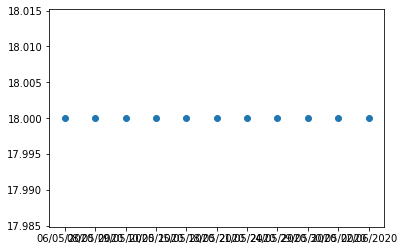

In [36]:
ml=list(G)
x= np.array(ml)
y= np.array(Yb)
plt.scatter(x,y)





In [31]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

regr = linear_model.LinearRegression()
X = x.reshape(-1,1)
Y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

regr.fit(X_train, y_train) 
print('Regression Coefficients: {}'.format(regr.coef_[0])) 

y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='blue', linewidth=1)

regr.score(X, y)

NameError: name 'x' is not defined

In [119]:
for j in Y[0]:
    print(j)  

י
ב
נ
א
ל


In [ ]:
def 